# Exercises 10 to 13 (Chapter 9)

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

10. The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

In [5]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces(data_home='datasets/')

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to datasets/


In [10]:
data2 = data.data
data2.shape

(400, 4096)

In [11]:
data2[:5]
# Values are already scaled between 0 and 1

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       [0.1983471 , 0.19421488, 0.19421488, ..., 0.75206614, 0.75206614,
        0.73966944],
       [0.5       , 0.54545456, 0.58264464, ..., 0.17768595, 0.17355372,
        0.17355372]], dtype=float32)

In [12]:
target = data.target
target.shape

(400,)

In [13]:
target[:5]

array([0, 0, 0, 0, 0])

In [14]:
np.unique(target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [15]:
print(data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [9]:
type(data.DESCR)

str

In [10]:
# With `type` I can get the class of an object
type(data)

sklearn.utils.Bunch

In [11]:
# This returns the attributes of an object
vars(data)

{}

In [12]:
# THIS is the function I was looking for
dir(data)

['DESCR', 'data', 'images', 'target']

In [16]:
# Split the data and the labels in train, validation and test
# I need to do stratified sampling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data2, target, test_size=0.2, random_state=1, stratify = target
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1, stratify = y_train
)

In [17]:
# Checking that the sampling kept the proportions
np.unique(target, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10]))

In [18]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]))

In [19]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [20]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

Yes! all the datasets have the same proportions of target labels

Clustering using K-means + choosing an appropriate number of clusters (using elbow method and sillhouete)

In [21]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
               for k in range(1, 50)]

inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k_plot_exercise


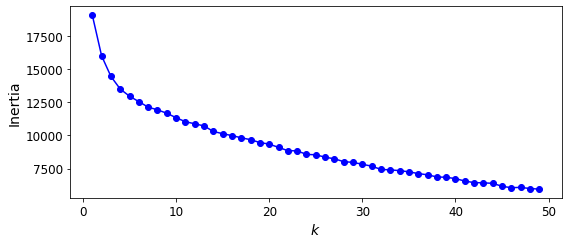

In [22]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 50), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
#plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot_exercise")
plt.show()

Well, I would say that the plot isn't very conclusive. Let's try the sillhouette method

In [23]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[1:]]
# It seems that the silhouette isn't defined for when we have 1 cluster

Saving figure silhouette_score_vs_k_plot_exercises


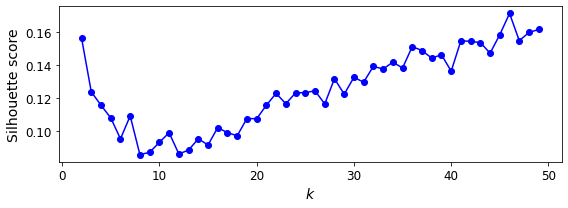

In [24]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 50), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot_exercises")
plt.show()

This seems more informative, but it suggest that I should continue exploring K values beyond 50

In [25]:
kmeans_per_k2 = [KMeans(n_clusters=k, random_state=42).fit(X_train)
               for k in range(50, 80)]

silhouette_scores2 = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k2]

Saving figure silhouette_score_vs_k_plot_exercises


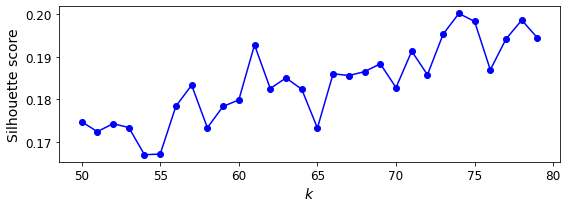

In [26]:
plt.figure(figsize=(8, 3))
plt.plot(range(50, 80), silhouette_scores2, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot_exercises")
plt.show()

LOL, it keeps increasing. I won't bother with the sihouette diagram because the values of K are so high that the diagram is not going to be helpful. I know for sure that the appropriate number of clusters is 40 so I'll go ahead with that value. 

(BTW, according to the book, the appropriate number is 120. I'll try both then)

Now I have to do a K-means clustering with K=40 and then visualise the results

In [27]:
final_clustering_k40 = KMeans(n_clusters=40, init="random", n_init=20,
                         algorithm="full", random_state=1989)


final_clustering_k40.fit(X_train)

KMeans(algorithm='full', init='random', n_clusters=40, n_init=20,
       random_state=1989)

In [28]:
final_clustering_k40.labels_

array([15, 32, 17, 26, 19,  3, 20, 24,  4, 17, 21,  0, 37, 36,  9, 24, 16,
       36, 33, 19, 22, 10, 23, 34,  5, 13,  7, 10, 34, 36, 33, 10,  8, 28,
       33, 37,  7, 18, 36, 35, 29,  5,  6, 33,  1,  3, 22, 20,  8,  0, 26,
        2, 37,  4, 13, 12, 29, 33, 22, 36, 21, 10, 33,  0, 14, 22, 20,  6,
       22,  9,  2, 20,  6, 26, 20, 38,  9, 28, 28, 24, 17, 25, 18, 13, 30,
       22, 22, 22, 28, 28, 18,  3, 10,  5, 32, 39, 39, 38, 10, 21,  4, 23,
       33, 37, 20, 22,  6,  2,  1, 18, 35, 20,  9, 25, 13, 16, 39, 31,  6,
        9, 22, 22,  6, 39, 25, 17,  6,  8, 24, 13, 10, 28, 13,  6, 15, 38,
       18, 25, 14,  6, 35, 25,  8, 33, 39, 25, 35, 30, 18, 16,  2,  7, 25,
       25, 17, 22, 16, 13, 21,  9, 34, 35, 20, 22,  2, 13,  0, 15, 20, 35,
       25, 10, 19, 32, 35, 26,  8, 32, 19, 19,  9, 20, 17, 25, 15,  1, 14,
        2, 30,  0,  3, 36, 36,  3, 22,  7, 21, 19,  0, 36, 11, 36,  8, 36,
       19, 13, 33,  2, 38, 22, 20, 36, 22,  6, 19, 25,  6, 14,  0, 24, 39,
       36, 10,  3, 35, 25

Cluster 0


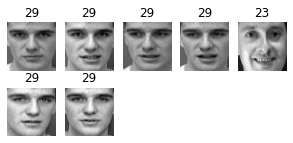

Cluster 1


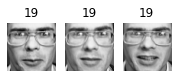

Cluster 2


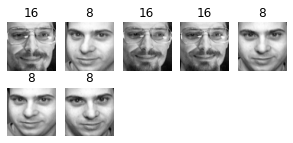

Cluster 3


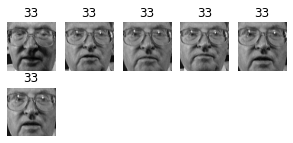

Cluster 4


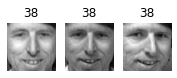

Cluster 5


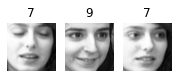

Cluster 6


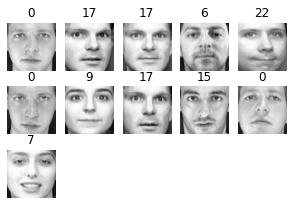

Cluster 7


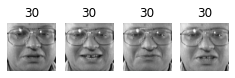

Cluster 8


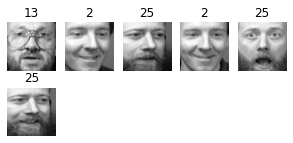

Cluster 9


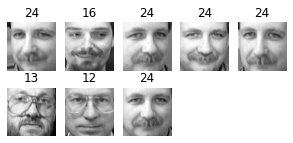

Cluster 10


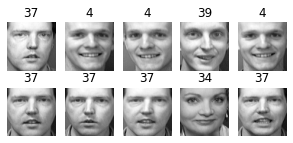

Cluster 11


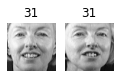

Cluster 12


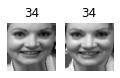

Cluster 13


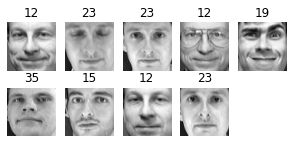

Cluster 14


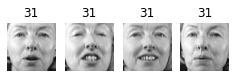

Cluster 15


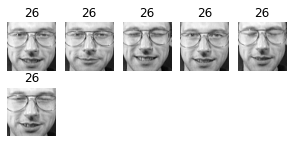

Cluster 16


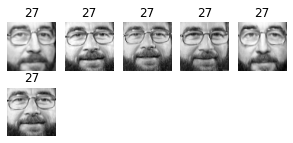

Cluster 17


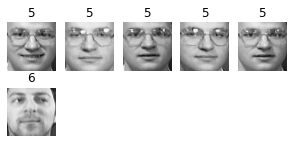

Cluster 18


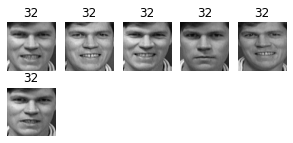

Cluster 19


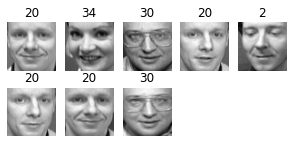

Cluster 20


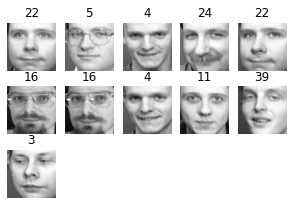

Cluster 21


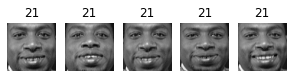

Cluster 22


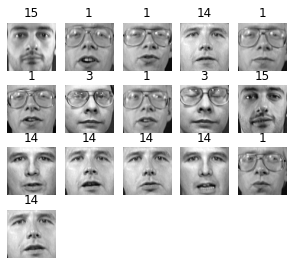

Cluster 23


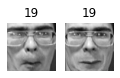

Cluster 24


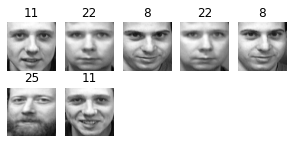

Cluster 25


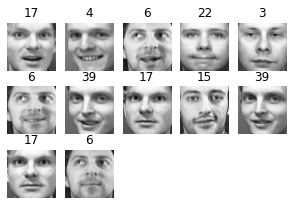

Cluster 26


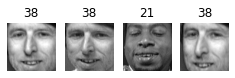

Cluster 27


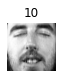

Cluster 28


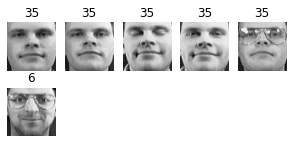

Cluster 29


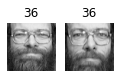

Cluster 30


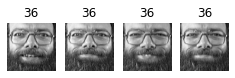

Cluster 31


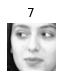

Cluster 32


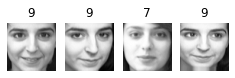

Cluster 33


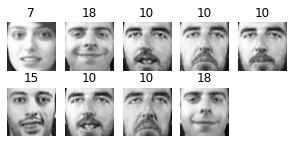

Cluster 34


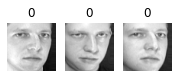

Cluster 35


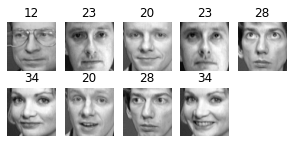

Cluster 36


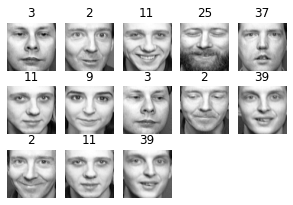

Cluster 37


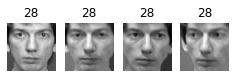

Cluster 38


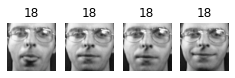

Cluster 39


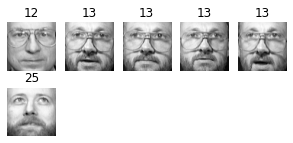

In [29]:
# Plotting
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
# The code above uses plt.subplot to iteratively display each of the faces
# The function plt.imshow is the one that displays the faces themselves

for cluster_id in np.unique(final_clustering_k40.labels_):
    print("Cluster", cluster_id)
    in_cluster = final_clustering_k40.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Well, it's not terrible: most clusters have a certain label that predominates, but they're not pure (many clusters have faces from different people).

Let's see what happens with k = 120

Cluster 0


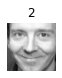

Cluster 1


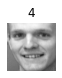

Cluster 2


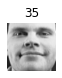

Cluster 3


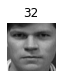

Cluster 4


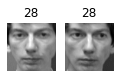

Cluster 5


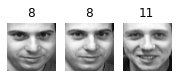

Cluster 6


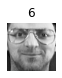

Cluster 7


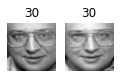

Cluster 8


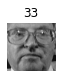

Cluster 9


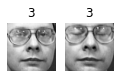

Cluster 10


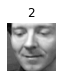

Cluster 11


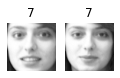

Cluster 12


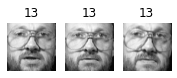

Cluster 13


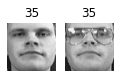

Cluster 14


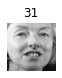

Cluster 15


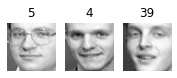

Cluster 16


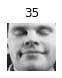

Cluster 17


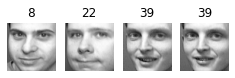

Cluster 18


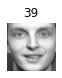

Cluster 19


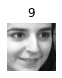

Cluster 20


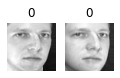

Cluster 21


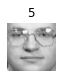

Cluster 22


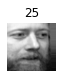

Cluster 23


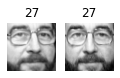

Cluster 24


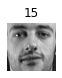

Cluster 25


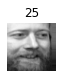

Cluster 26


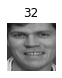

Cluster 27


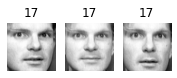

Cluster 28


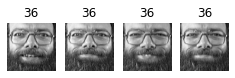

Cluster 29


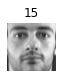

Cluster 30


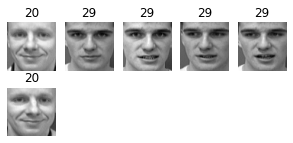

Cluster 31


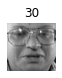

Cluster 32


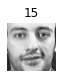

Cluster 33


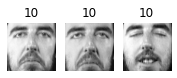

Cluster 34


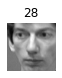

Cluster 35


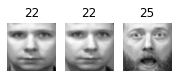

Cluster 36


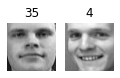

Cluster 37


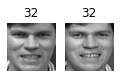

Cluster 38


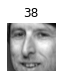

Cluster 39


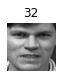

Cluster 40


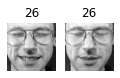

Cluster 41


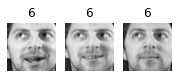

Cluster 42


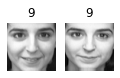

Cluster 43


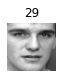

Cluster 44


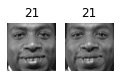

Cluster 45


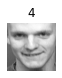

Cluster 46


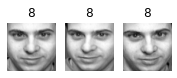

Cluster 47


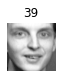

Cluster 48


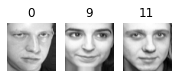

Cluster 49


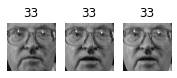

Cluster 50


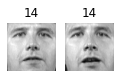

Cluster 51


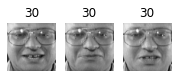

Cluster 52


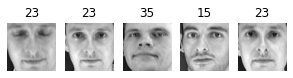

Cluster 53


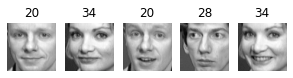

Cluster 54


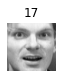

Cluster 55


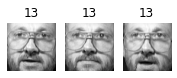

Cluster 56


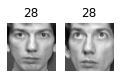

Cluster 57


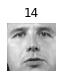

Cluster 58


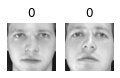

Cluster 59


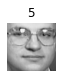

Cluster 60


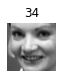

Cluster 61


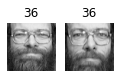

Cluster 62


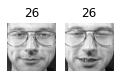

Cluster 63


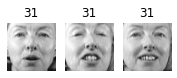

Cluster 64


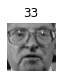

Cluster 65


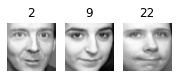

Cluster 66


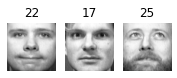

Cluster 67


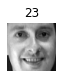

Cluster 68


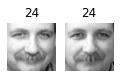

Cluster 69


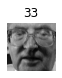

Cluster 70


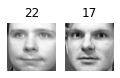

Cluster 71


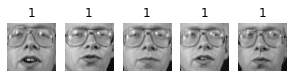

Cluster 72


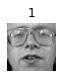

Cluster 73


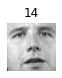

Cluster 74


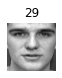

Cluster 75


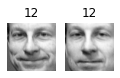

Cluster 76


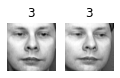

Cluster 77


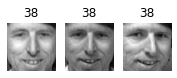

Cluster 78


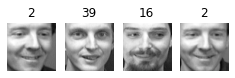

Cluster 79


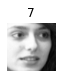

Cluster 80


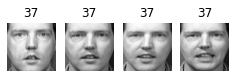

Cluster 81


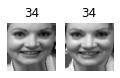

Cluster 82


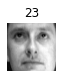

Cluster 83


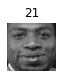

Cluster 84


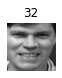

Cluster 85


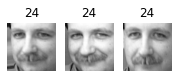

Cluster 86


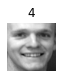

Cluster 87


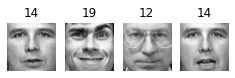

Cluster 88


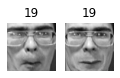

Cluster 89


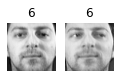

Cluster 90


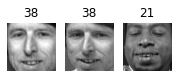

Cluster 91


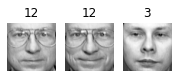

Cluster 92


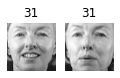

Cluster 93


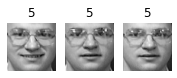

Cluster 94


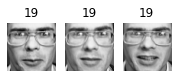

Cluster 95


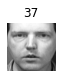

Cluster 96


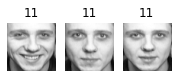

Cluster 97


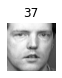

Cluster 98


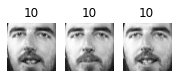

Cluster 99


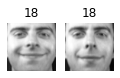

Cluster 100


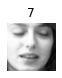

Cluster 101


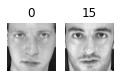

Cluster 102


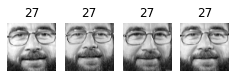

Cluster 103


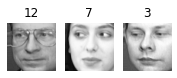

Cluster 104


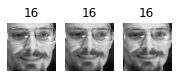

Cluster 105


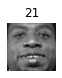

Cluster 106


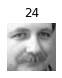

Cluster 107


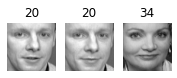

Cluster 108


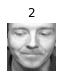

Cluster 109


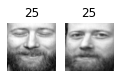

Cluster 110


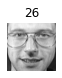

Cluster 111


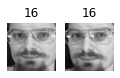

Cluster 112


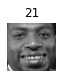

Cluster 113


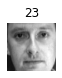

Cluster 114


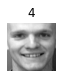

Cluster 115


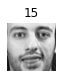

Cluster 116


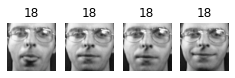

Cluster 117


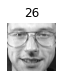

Cluster 118


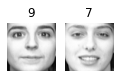

Cluster 119


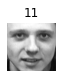

In [30]:
final_clustering_k120 = KMeans(n_clusters=120, init="random", n_init=20,
                         algorithm="full", random_state=1989)


final_clustering_k120.fit(X_train)

for cluster_id in np.unique(final_clustering_k120.labels_):
    print("Cluster", cluster_id)
    in_cluster = final_clustering_k120.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

It's better but we still get some mixed clusters with faces from different people. Maybe K-Means is not suited for this task.

11. Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. 

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Parameters to tune: n_estimators and lerning_rate,
# plus those from the base learner (Decision Trees, in this case)
gbm_faces1 = GradientBoostingClassifier(random_state=1989)

grid_gbm_faces1 = {
    'n_estimators':[50, 100, 500],
    'learning_rate': [0.01, 0.1, 0.5],
    'min_samples_leaf': [1, 2]
}

In [32]:
from os.path import exists
from joblib import dump, load

if exists('outputs/clf1_ch9.joblib'):
    clf1 = load('outputs/clf1_ch9.joblib')
else:
    clf1 = GridSearchCV(gbm_faces1, grid_gbm_faces1, n_jobs=-1, verbose=2, cv=3)
    clf1.fit(X_train, y_train)
    dump(clf1, 'outputs/clf1_ch9.joblib')


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END learning_rate=0.01, min_samples_leaf=1, n_estimators=50; total time= 7.0min
[CV] END learning_rate=0.01, min_samples_leaf=1, n_estimators=50; total time= 7.0min
[CV] END learning_rate=0.01, min_samples_leaf=1, n_estimators=50; total time= 7.0min
[CV] END learning_rate=0.01, min_samples_leaf=2, n_estimators=50; total time= 5.9min
[CV] END learning_rate=0.01, min_samples_leaf=2, n_estimators=50; total time= 5.9min
[CV] END learning_rate=0.01, min_samples_leaf=1, n_estimators=100; total time=13.0min
[CV] END learning_rate=0.01, min_samples_leaf=1, n_estimators=100; total time=13.0min
[CV] END learning_rate=0.01, min_samples_leaf=1, n_estimators=100; total time=13.1min
[CV] END learning_rate=0.01, min_samples_leaf=2, n_estimators=50; total time= 6.1min
[CV] END learning_rate=0.01, min_samples_leaf=2, n_estimators=100; total time=11.8min
[CV] END learning_rate=0.01, min_samples_leaf=2, n_estimators=100; total time=11.8min

In [33]:
clf1.best_score_

0.5875

In [35]:
# Check performance on validation data
from sklearn.metrics import accuracy_score

y_pred_1 = clf1.predict(X_val)
accuracy_score(y_val, y_pred_1)

0.55

Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)? *this inolves doing GridSearch or RandomSearch with cross validation)

In [36]:
# KMEANS for DIMENSIONALITY REDUCTION: FIRST LET'S TRY WITH 120 CLUSTERS
from sklearn.pipeline import Pipeline

pipeline1 = Pipeline([
    ("kmeans", KMeans(n_clusters=120, random_state=1989)),
    ("GBM", GradientBoostingClassifier(**clf1.best_params_))
])

pipeline1.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=120, random_state=1989)),
                ('GBM',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            min_samples_leaf=2,
                                            n_estimators=500))])

In [37]:
y_pred_2 = pipeline1.predict(X_val)
accuracy_score(y_val, y_pred_2)

0.625

(commentary on the accuracy I got)

In [38]:
# NOW LET'S TRY RANDOM SEARCH WITH CLUSTER NUMBERS
from sklearn.model_selection import RandomizedSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 150))

pipeline2 = Pipeline([
    ("kmeans", KMeans(random_state=1989)),
    ("GBM", GradientBoostingClassifier(**clf1.best_params_))
])

rnd_clf = RandomizedSearchCV(pipeline2, param_grid, cv=3, verbose=2, n_iter=8)

rnd_clf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ..............................kmeans__n_clusters=50; total time=  37.0s
[CV] END ..............................kmeans__n_clusters=50; total time=  43.9s
[CV] END ..............................kmeans__n_clusters=50; total time=  44.9s
[CV] END .............................kmeans__n_clusters=136; total time= 1.4min
[CV] END .............................kmeans__n_clusters=136; total time= 1.3min
[CV] END .............................kmeans__n_clusters=136; total time= 1.4min
[CV] END ..............................kmeans__n_clusters=33; total time=  44.4s
[CV] END ..............................kmeans__n_clusters=33; total time=  38.9s
[CV] END ..............................kmeans__n_clusters=33; total time=  39.7s
[CV] END ..............................kmeans__n_clusters=67; total time=  47.1s
[CV] END ..............................kmeans__n_clusters=67; total time=  48.2s
[CV] END ..............................kmeans__n_

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('kmeans',
                                              KMeans(random_state=1989)),
                                             ('GBM',
                                              GradientBoostingClassifier(learning_rate=0.01,
                                                                         min_samples_leaf=2,
                                                                         n_estimators=500))]),
                   n_iter=8,
                   param_distributions={'kmeans__n_clusters': range(2, 150)},
                   verbose=2)

In [39]:
rnd_clf.best_params_

{'kmeans__n_clusters': 136}

In [41]:
y_pred_3 = rnd_clf.predict(X_val)
accuracy_score(y_val, y_pred_3)

0.6375

And now let's try appending the features from the reduced set to the original features. This involves creating a custom pipeline. But in the book solutions they don't do that, but just use the "best k means model" instead (the one that maximised the sillhouete)

In [42]:
# Using K=120
X_train_reduced = final_clustering_k120.transform(X_train)
X_val_reduced = final_clustering_k120.transform(X_val)
X_test_reduced = final_clustering_k120.transform(X_test)

In [43]:
X_train_extended = np.c_[X_train, X_train_reduced]
X_valid_extended = np.c_[X_val, X_val_reduced]
X_test_extended = np.c_[X_test, X_test_reduced]

In [44]:
gbm3 = GradientBoostingClassifier(**clf1.best_params_)
gbm3.fit(X_train_extended, y_train)
gbm3.score(X_valid_extended, y_val) # Note how is not necessary to use `accuracy_score`

0.6375

12. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance).

In [45]:
# This time I'll use the whole data
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_reduced = pca.fit_transform(data2)
X_reduced.shape

(400, 260)

In [46]:
from sklearn.mixture import GaussianMixture

if exists('outputs/gm_ch9.joblib'):
    gm = load('outputs/gm_ch9.joblib')
else:
    gm = GaussianMixture(n_components=40, n_init=10, random_state=1989)
    gm.fit(X_reduced)
    dump(gm, 'outputs/gm_ch9.joblib')

gm = GaussianMixture(n_components=40, n_init=10, random_state=1989)
gm.fit(X_reduced)

GaussianMixture(n_components=40, n_init=10, random_state=1989)

Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method).

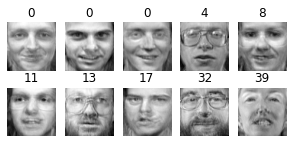

In [47]:
# Documentation of this method: 
# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.sample
new_faces_reduced, y_new_faces = gm.sample(10)
new_faces = pca.inverse_transform(new_faces_reduced)

# So, the `y_new_labels` contains the labels that are supossed to 
plot_faces(new_faces, y_new_faces)

Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).

(Note that I'm supossed to modify the original images (those in `X_train`), not the generated ones)

In [48]:
n_rotated = 4
# Below, the `axes` argument specifies how the figure will be transposed
# In this case, we're keeping the 0th axis constant, and transposing the other two
# The 0th axis is like the index of the instances, so it doesn't make sense to transpose it
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
# Returning the images to their original shape
rotated = rotated.reshape(-1, 64*64)
# Getting the labels of the rotated images
y_rotated = y_train[:n_rotated]

In [49]:
n_flipped = 3
# I THINK that [:, ::-1] keeps the first axis constant but turns 
# list[<start>:<stop>:<step>], so ::-1 means going from the end to the beginning
flipped = X_train[n_rotated:(n_flipped+n_rotated)].reshape(-1, 64, 64)[:, ::-1]
# This is the same as before
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

In [50]:
n_darkened = 3
darkened = X_train[(n_flipped+n_rotated):(n_flipped+n_rotated+n_darkened)].copy()
# I know that the RHS reduces all the values of the picture,
# which makes it darker because they're brigthness/whiteness values
darkened[:, 1:-1] *= 0.3
# Notice that here we don't do the reshaping, so each element is 1D with length 64*64
# But I don't get what is the purpose of the 1:-1
y_darkened = y_train[:n_darkened]

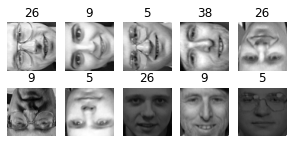

In [51]:
# np.r_ concatenates along the first axis, so here we're basically joining the instances
X_bad_faces = np.r_[rotated, flipped, darkened]

# np.concatenate seems to be very similar to np.r_, with just some small differences
# https://stackoverflow.com/questions/37743843/python-why-use-numpy-r-instead-of-concatenate
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [52]:
# This are transformations on the original data,
# in order to pass them to `score_samples()` we need to apply pca.transform
X_bad_faces_pca = pca.transform(X_bad_faces)

In [53]:
gm.score_samples(X_bad_faces_pca)

array([-35983253.79947606, -44970722.2063246 , -23112497.21755608,
       -20005698.58653237, -30191281.28954838, -41992593.00123072,
       -32913519.94293415, -69082804.47072719, -81706713.07218216,
       -40548313.90958712])

In [55]:
gm.score_samples(X_reduced[:10])

array([1504.80616834, 1510.96351134, 1504.80616818, 1438.82473104,
       1510.96351115, 1438.82472832, 1396.90439214, 1396.90439128,
       1498.81231237, 1510.96351105])

There is a a clear difference in the likelihood scores between the transformed faces (highly unlikely), versus the actual faces from the training data.

13. Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. 


In [59]:
# I think I already have this with `X_reduced`
X_reduced.shape

(400, 260)


Then compute the reconstruction error for each image.

In [63]:
X_reconstructed = pca.inverse_transform(X_reduced)

# Computing the reconstruction error of the original images
np.mean(np.sum(np.square(X_reconstructed  - data2), axis=1))

0.7887709

 Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. 

In [64]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)

np.mean(np.sum(np.square(X_bad_faces_reconstructed  - X_bad_faces), axis=1))

15.916536


If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

In [65]:
X_bad_faces_reconstructed.shape

(10, 4096)

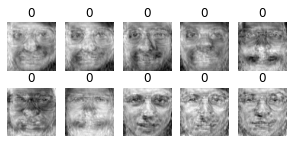

In [66]:
plot_faces(X_bad_faces_reconstructed, target[:10])